In [1]:
import os
import random
import numpy as np 
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import math

TRAIN_DIR = '/Users/shaaky/CODE/CVPR/DataSet/CIFAR-10-images-master/test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


In [2]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    label = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (32, 32))
        TRAIN_DATA.append([img_arr, label])

print(f"Total Train Data: {len(TRAIN_DATA)}")

100%|██████████| 1000/1000 [00:00<00:00, 10120.32it/s]

Total Train Data: 10000


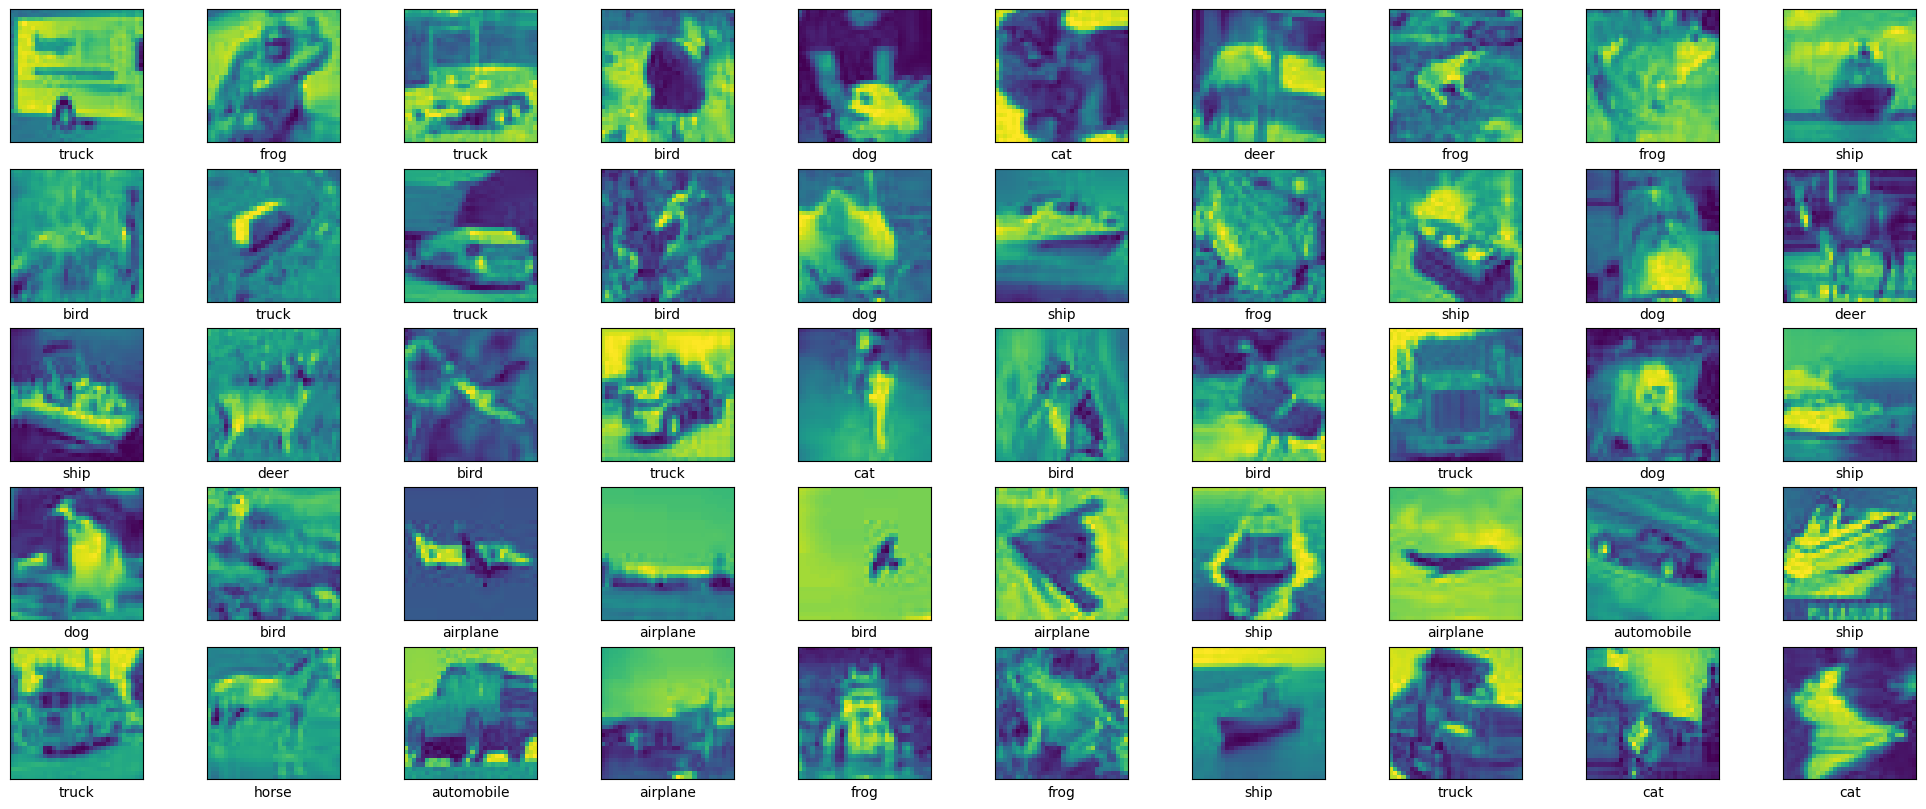

In [3]:
random.shuffle(TRAIN_DATA)
# for i in TRAIN_DATA[0:1]:
#     print(i[1],[0])

plt.figure(figsize=(25,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()


In [4]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Combine the images and labels for the dataset
data, labels = zip(*TRAIN_DATA)
data = np.array(data)
labels = np.array(labels)

# Define the number of neighbors (K) to experiment with
k_values = [1, 3, 5, 7, 9]

# Define the distance metrics
distance_metrics = ['manhattan', 'euclidean']

# Initialize arrays to store results
results = {distance_metric: [] for distance_metric in distance_metrics}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5)

for distance_metric in distance_metrics:
    for k in k_values:
        accuracy_scores = []
        for train_indices, val_indices in kf.split(data):
            train_data = data[train_indices]
            train_labels = labels[train_indices]
            val_data = data[val_indices]
            val_labels = labels[val_indices]

            # Create the k-NN classifier with the current parameters
            classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
            classifier.fit(train_data.reshape(len(train_data), -1), train_labels)

            # Make predictions on the validation set
            predictions = classifier.predict(val_data.reshape(len(val_data), -1))

            # Calculate accuracy and store it
            accuracy = accuracy_score(val_labels, predictions)
            accuracy_scores.append(accuracy)

        # Calculate and store the mean accuracy across 5 folds
        mean_accuracy = np.mean(accuracy_scores)
        results[distance_metric].append(mean_accuracy)

# Print the results
for distance_metric, accuracy_values in results.items():
    print(f"Distance Metric: {distance_metric.capitalize()}")
    for k, accuracy in zip(k_values, accuracy_values):
        print(f"k = {k}, Mean Accuracy: {accuracy:.4f}")
    print()


Distance Metric: Manhattan
k = 1, Mean Accuracy: 0.2579
k = 3, Mean Accuracy: 0.2560
k = 5, Mean Accuracy: 0.2704
k = 7, Mean Accuracy: 0.2729
k = 9, Mean Accuracy: 0.2730

Distance Metric: Euclidean
k = 1, Mean Accuracy: 0.2365
k = 3, Mean Accuracy: 0.2306
k = 5, Mean Accuracy: 0.2444
k = 7, Mean Accuracy: 0.2477
k = 9, Mean Accuracy: 0.2489



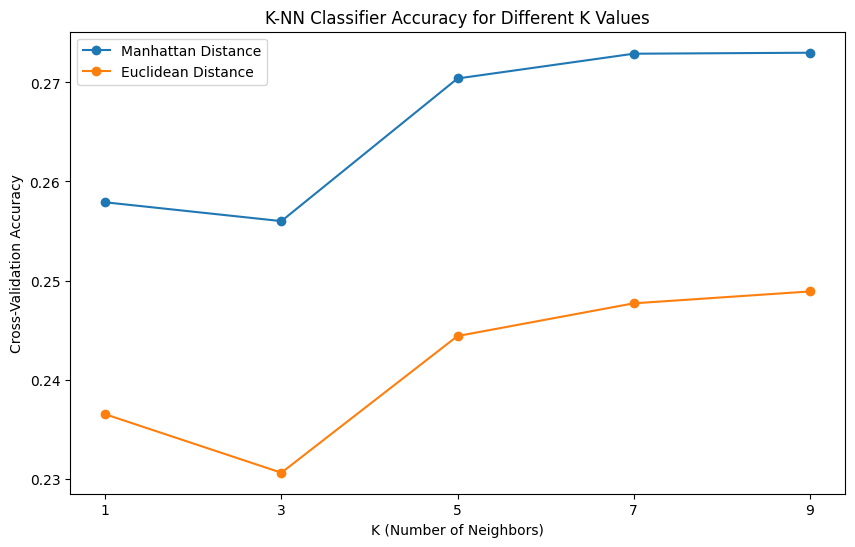

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))
for distance_metric, accuracy_values in results.items():
    plt.plot(k_values, accuracy_values, marker='o', label=f'{distance_metric.capitalize()} Distance')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-NN Classifier Accuracy for Different K Values')
plt.xticks(k_values)
plt.legend()
plt.show()

In [11]:
from sklearn.impute import SimpleImputer

# Load and preprocess test images
TEST_DIR = '/Users/shaaky/CODE/CVPR/DataSet/test'  # Replace with the path to your test image directory
test_images = []

for img_file in os.listdir(TEST_DIR):
    img_path = os.path.join(TEST_DIR, img_file)
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    #img_arr = cv2.resize(img_arr, (32, 32))
    test_images.append(img_arr)

# Reshape the test images for prediction
test_data = np.array(test_images)

# Flatten the test data
test_data = test_data.reshape(test_data.shape[0], -1)

# Create an imputer transformer to handle missing values
imputer = SimpleImputer(strategy='mean')
test_data = imputer.fit_transform(test_data)

# Make predictions using your trained KNN classifier
predictions = classifier.predict(test_data)

# Display the top five predictions for each test image
for i, test_image in enumerate(test_images):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(test_image, cmap='gray')
    plt.title('Test Image')
    plt.axis('off')

    # Get the top 5 predictions for the current test image
    distances, indices = classifier.kneighbors(test_data[i].reshape(1, -1), n_neighbors=5)
    
    for j, index in enumerate(indices[0]):
        plt.subplot(2, 3, j + 2)
        plt.imshow(data[index].reshape(32, 32), cmap='gray')
        plt.title(f'Prediction {j + 1}: {CATEGORIES[labels[index]]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


/Users/shaaky/anaconda3/envs/cvpr/lib/python3.10/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(11, 0)) while a minimum of 1 is required by KNeighborsClassifier.